In [37]:
import pandas as pd
import numpy as np
import geopandas
import json
import shapely


In [2]:
data_traslados = geopandas.read_file('datos_prueba.json')
print(type(data_traslados))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [3]:
import geoplot
import geoplot.crs as gcrs

<GeoAxes: >

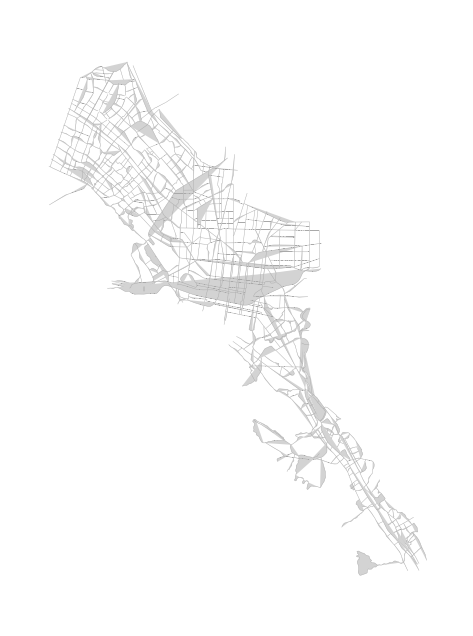

In [4]:
geoplot.polyplot(
    data_traslados,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)

Skipping field HoraOri: unsupported OGR type: 10
Skipping field HoraDest: unsupported OGR type: 10


<GeoAxes: >

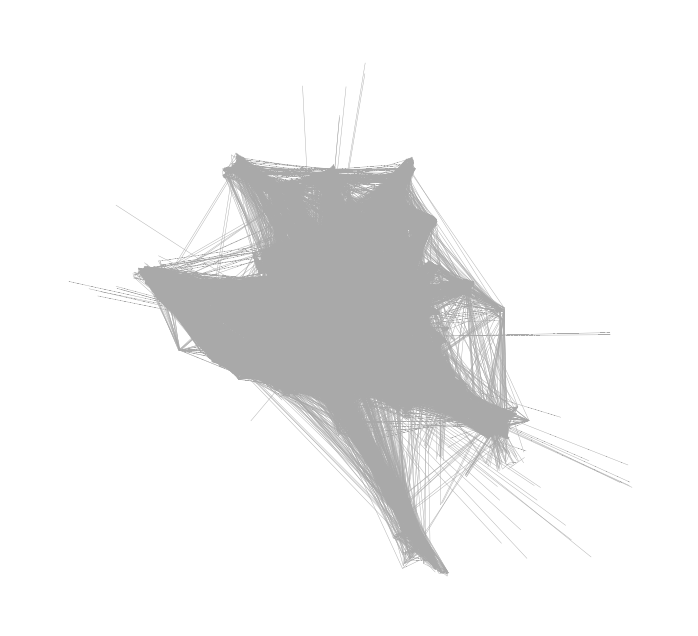

In [5]:
data_transporte = geopandas.read_file('Transporte.geojson')

geoplot.polyplot(
    data_transporte,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)

In [6]:
calles = json.load(open('datos_prueba.json'))

In [7]:
# select features where 'nombre' is 'Av. Adolfo Ruiz Cortines' and 'tipo' is 'Vialidad Principal' from dict calles
lim_norte = [feature for feature in calles['features'] if feature['properties']['nombre'] == 'Av. Adolfo Ruiz Cortines' and feature['properties']['tipo'] == 'Vialidad Principal']
lim_este = [feature for feature in calles['features'] if feature['properties']['nombre'] == 'Constituyentes De Nuevo León']
lim_sur = [feature for feature in calles['features'] if feature['properties']['nombre'] == 'Av. Dr. Ignacio Morones Prieto']
lim_oeste = [feature for feature in calles['features'] if feature['properties']['nombre'] == 'Av. Dr. José Eleuterio González']

In [8]:
# print coordinates of lim_oeste
coords_oeste = lim_oeste[0]['geometry']['coordinates'][0]
coords_oeste = [(x, y) for x, y in coords_oeste]
print(coords_oeste)

noroeste_oeste = coords_oeste[0]
suroeste_oeste = coords_oeste[-1]

print(noroeste_oeste)
print(suroeste_oeste)

[(-100.3526976, 25.67283714), (-100.35337486, 25.67091335)]
(-100.3526976, 25.67283714)
(-100.35337486, 25.67091335)


In [9]:
# print coordinates of lim_oeste
coords_sur = lim_sur[0]['geometry']['coordinates'][0]
print(coords_sur)

suroeste_sur = coords_sur[0]
sureste_sur = coords_sur[-1]
print(suroeste_sur)
print(sureste_sur)

[[-100.39791201, 25.67109327], [-100.39765316, 25.67104797], [-100.39643086, 25.67111701], [-100.39581428, 25.67113724], [-100.39538679, 25.67109833], [-100.39491081, 25.67096911], [-100.39444082, 25.67088038], [-100.39409291, 25.67090526], [-100.39378295, 25.670999], [-100.39295362, 25.67131268], [-100.39218599, 25.671492], [-100.39178015, 25.67150065], [-100.39142737, 25.67141939], [-100.39055948, 25.67122721], [-100.39001406, 25.67104928], [-100.3892244, 25.67067501], [-100.38825393, 25.67020128], [-100.38721959, 25.66965537], [-100.38667336, 25.66942367], [-100.38614811, 25.66926465], [-100.38571212, 25.66922691], [-100.38492175, 25.66926308], [-100.38446403, 25.66934387], [-100.38407939, 25.66936185], [-100.3837038, 25.66925075], [-100.38320486, 25.66890989], [-100.38275803, 25.66856789], [-100.3821508, 25.66828208], [-100.38108445, 25.66794737], [-100.3800438, 25.66776611], [-100.37796841, 25.6678078], [-100.37437671, 25.66778137], [-100.37278121, 25.6679445], [-100.37139605, 25.

In [10]:
centromty_polygon = shapely.Polygon([
    (-100.351,25.705),
    (-100.353,25.671),
    (-100.307,25.662),
    (-100.278,25.673),
    (-100.268,25.683),
    (-100.268,25.703)
])

# create geodataframe
centromty_gdf = geopandas.GeoDataFrame(geometry=[centromty_polygon])

(<matplotlib.patches.PathPatch at 0x231bd548650>,
 <matplotlib.lines.Line2D at 0x231be6caf90>)

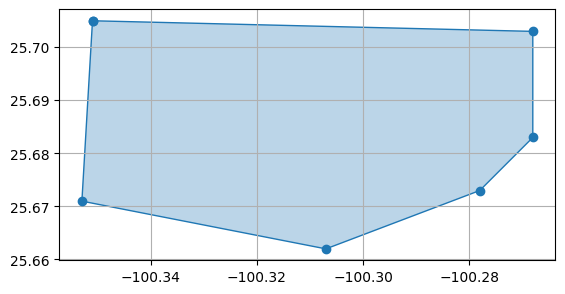

In [11]:
# plot geodataframe
import shapely.plotting

shapely.plotting.plot_polygon(centromty_polygon)

In [12]:
centromty_gdp = geopandas.GeoSeries([centromty_polygon]).__geo_interface__

<GeoAxes: >

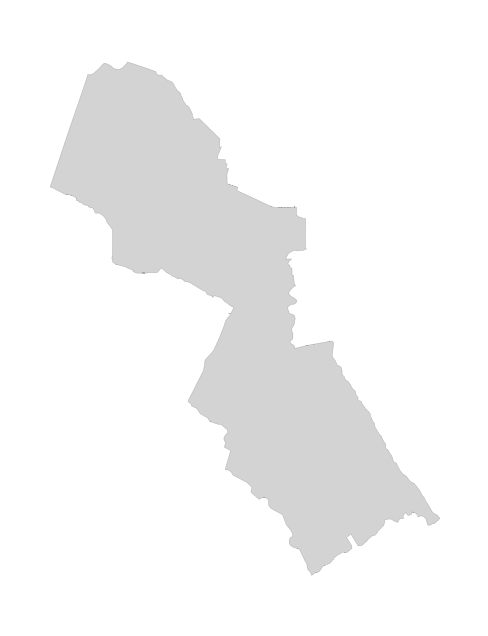

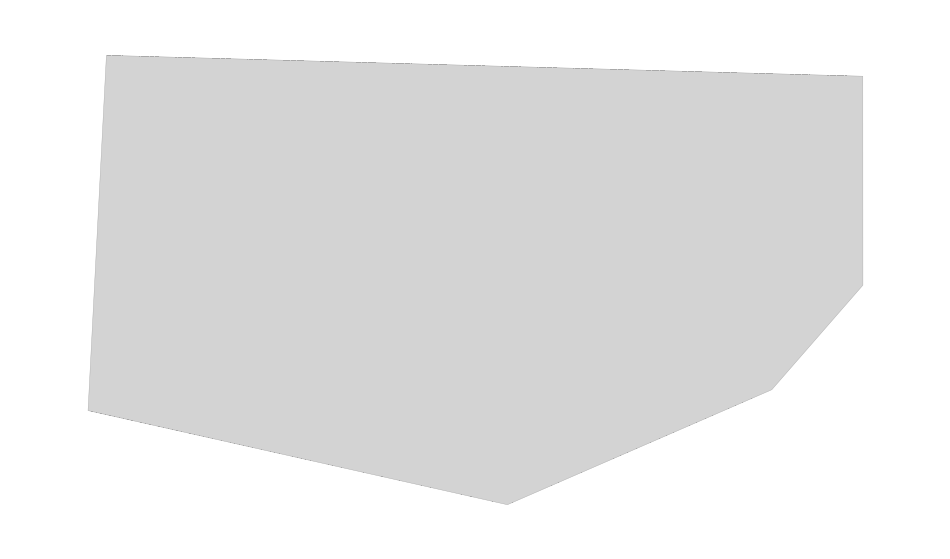

In [13]:
#nuevoleon = json.load(open('19_Nuevo_Leon.json'))
nuevoleon_gpd = geopandas.read_file('19_Nuevo_Leon.json')
monterrey_gpd = geopandas.read_file('monterrey_geo.json')

# plot centromty_gdf and nuevoleon_gpd in the same plot
geoplot.polyplot(
    monterrey_gpd,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)
geoplot.polyplot(
    centromty_gdf,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)


In [14]:
from matplotlib import pyplot as plt
from cartopy import crs as ccrs

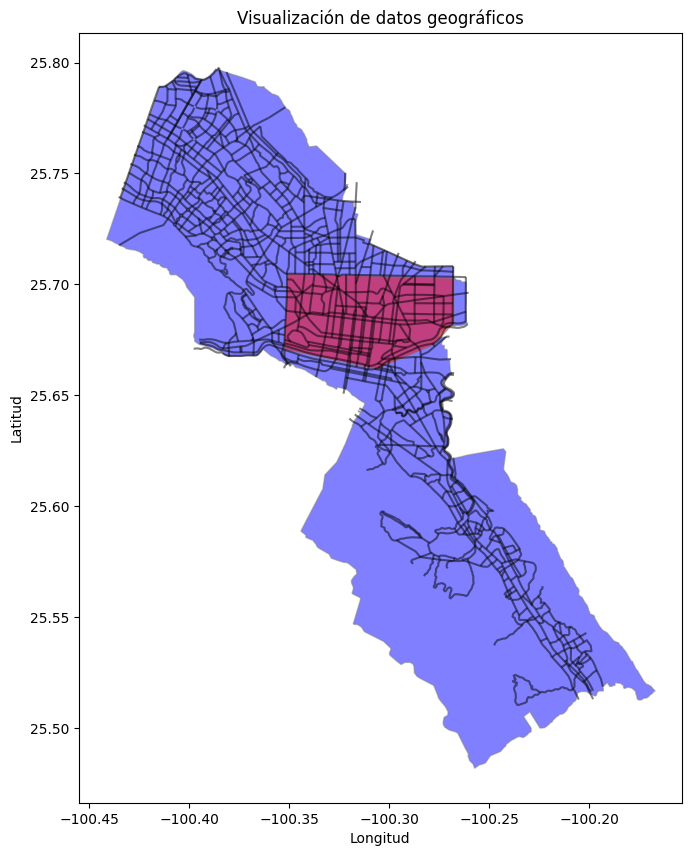

In [15]:
# Fuente JSON Monterrey: https://github.com/PhantomInsights/mexico-geojson/tree/main

fig, ax = plt.subplots(figsize=(10, 10))
monterrey_gpd.plot(ax=ax, color='blue', edgecolor='grey', alpha=0.5)
centromty_gdf.plot(ax=ax, color='red', edgecolor='grey', alpha=0.5)
data_traslados.plot(ax=ax, color='black', edgecolor='black', alpha=0.5)

# Optional: Set plot title and axis labels
ax.set_title("Visualización de datos geográficos")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()


In [16]:
# for pair of coordinates in data_transporte, check if it is inside centromty_polygon
inside = 0
outside = 0
data_traslados_internos = data_transporte.copy()

for i, row in data_transporte.iterrows():
    coords = row['geometry'].coords[0]
    point = shapely.geometry.Point(coords)
    if centromty_polygon.contains(point):
        inside += 1
    else:
        outside += 1

print(f'Inside: {inside}, Outside: {outside}')

Inside: 4567, Outside: 69762


In [17]:
# filter cases where coordinates are inside centromty_polygon as separate geodataframe
data_transporte_inside = data_traslados[data_traslados.geometry.apply(lambda geom: centromty_polygon.contains(geom.centroid))]

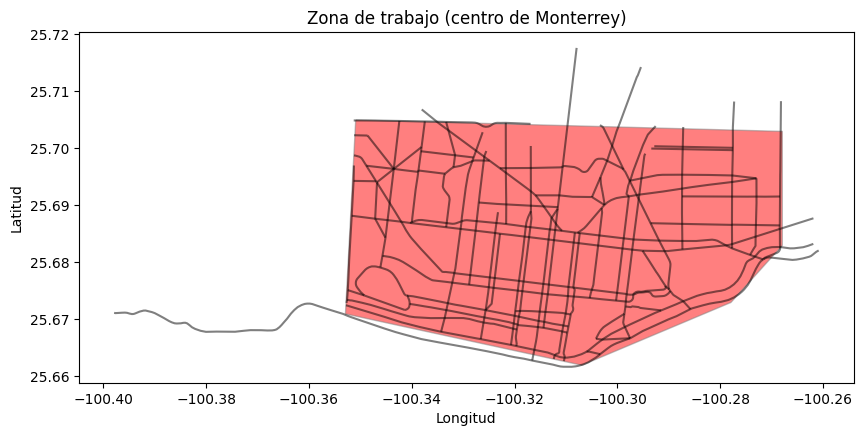

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
centromty_gdf.plot(ax=ax, color='red', edgecolor='grey', alpha=0.5)
data_transporte_inside.plot(ax=ax, color='black', edgecolor='black', alpha=0.5)

# Optional: Set plot title and axis labels
ax.set_title("Zona de trabajo (centro de Monterrey)")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()

In [20]:
transportepublico = geopandas.read_file('rutas-tpe-publico.geojson')

transportepublico_inside = transportepublico[transportepublico.geometry.apply(lambda geom: centromty_polygon.contains(geom.centroid))]

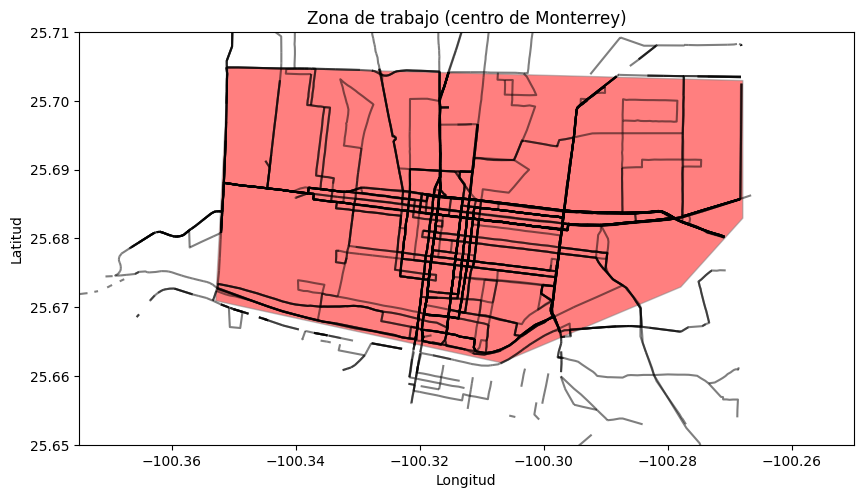

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
centromty_gdf.plot(ax=ax, color='red', edgecolor='grey', alpha=0.5)
transportepublico_inside.plot(ax=ax, color='black', edgecolor='black', alpha=0.5)

# Optional: Set plot title and axis labels
ax.set_title("Zona de trabajo (centro de Monterrey)")
ax.set_xlabel("Longitud")
ax.set_xlim(-100.375, -100.250)
ax.set_ylabel("Latitud")
ax.set_ylim(25.65, 25.71)

plt.show()

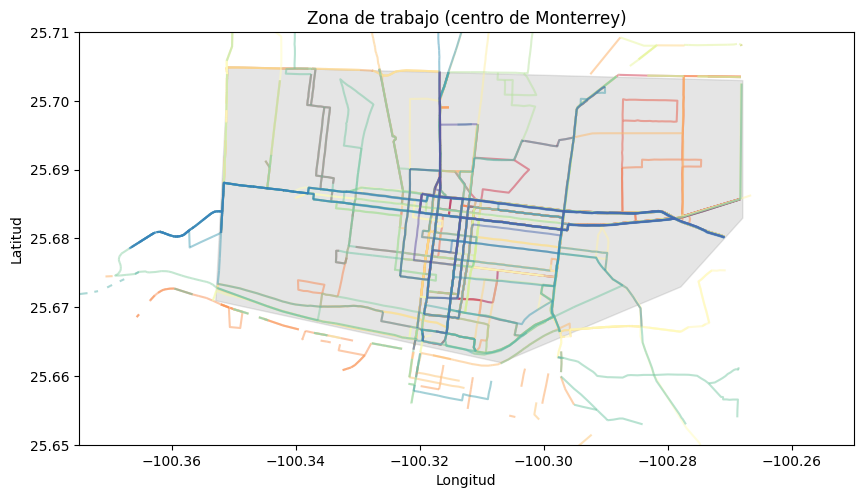

In [42]:
# Add column 'color' to transportepublico_inside
tpe_pub_plot = transportepublico_inside.copy()

n = len(np.unique(tpe_pub_plot['nombre']))
colors = plt.cm.Spectral(np.arange(n) / np.arange(n).max())

fig, ax = plt.subplots(figsize=(10, 10))
centromty_gdf.plot(ax=ax, color='grey', edgecolor='grey', alpha=0.2)
for i, e in enumerate(np.unique(tpe_pub_plot['nombre'])):
    tpe_pub_plot[tpe_pub_plot['nombre'] == e].plot(ax=ax, color=colors[i], edgecolor='black', alpha=0.5)

# Optional: Set plot title and axis labels
ax.set_title("Zona de trabajo (centro de Monterrey)")
ax.set_xlabel("Longitud")
ax.set_xlim(-100.375, -100.250)
ax.set_ylabel("Latitud")
ax.set_ylim(25.65, 25.71)

plt.show()

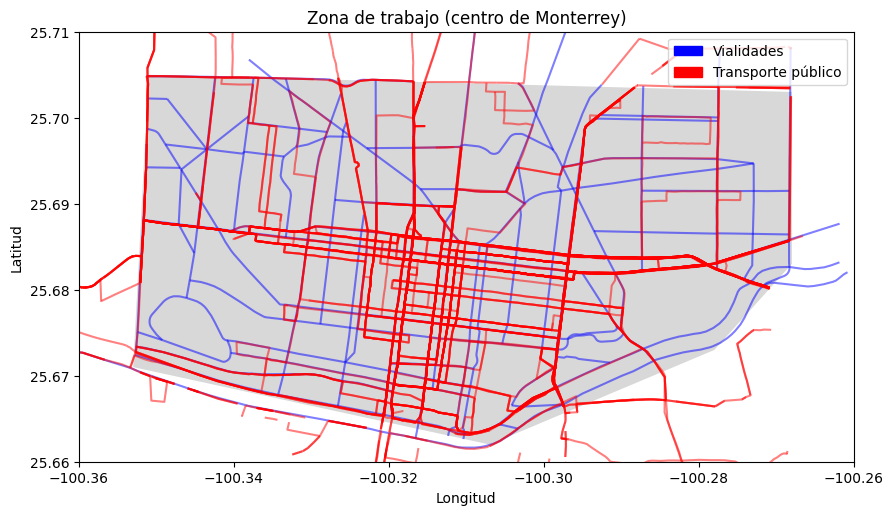

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
centromty_gdf.plot(ax=ax, color='grey', alpha=0.3)
data_transporte_inside.plot(ax=ax, color='blue', edgecolor='blue', alpha=0.5)
transportepublico_inside.plot(ax=ax, color='red', edgecolor='red', alpha=0.5)

# Optional: Set plot title and axis labels
ax.set_title("Zona de trabajo (centro de Monterrey)")
ax.set_xlabel("Longitud")
ax.set_xlim(-100.36, -100.26)
ax.set_ylabel("Latitud")
ax.set_ylim(25.66, 25.71)

# Add legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Vialidades')
red_patch = mpatches.Patch(color='red', label='Transporte público')
plt.legend(handles=[blue_patch, red_patch])

plt.show()

In [22]:
data_transporte_inside.to_file('data_transporte_inside.geojson', driver='GeoJSON')
transportepublico_inside.to_file('transportepublico_inside.geojson', driver='GeoJSON')

In [94]:
data_traslados_inside = data_transporte[data_transporte.geometry.apply(lambda geom: centromty_polygon.contains(geom.centroid))]

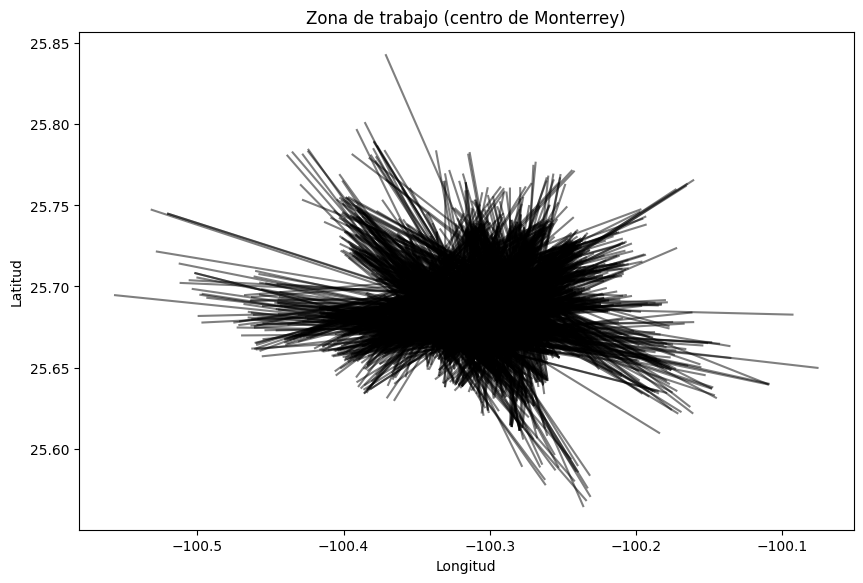

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
centromty_gdf.plot(ax=ax, color='red', edgecolor='grey', alpha=0.5)
data_traslados_inside.plot(ax=ax, color='black', edgecolor='black', alpha=0.5)

# Optional: Set plot title and axis labels
ax.set_title("Zona de trabajo (centro de Monterrey)")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

plt.show()

In [98]:
data_traslados_inside.shape

(2784, 3)